## Предобработка данных

### Импорт необходимых библиотек:

In [81]:
import numpy as np
import pandas as pd

### Загрузка данных:

In [82]:
TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'

In [83]:
df = pd.read_csv(TRAIN_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [84]:
df.shape

(10000, 20)

### Приведение типов данных:

In [85]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Количество комнат не может быть дробным:

In [86]:
df['Rooms'] = df['Rooms'].astype(int)

#### Номер этажа не может быть дробным:

In [87]:
df['Floor'] = df['Floor'].astype(int)

#### Количество этажей в доме не может быть дробным:

In [88]:
df['HouseFloor'] = df['HouseFloor'].astype(int)

In [89]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms              int32
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int32
HouseFloor         int32
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Обзор количественных переменных:

In [90]:
df_num_features = df.select_dtypes(include=['float64', 'int64','int32'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [91]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Обзор номинативных переменных:

In [92]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [93]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [94]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [95]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обработка пропусков:

In [96]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### LifeSquare

Замена всех null значений LifeSquare медианными значениями LifeSquare с учетом количества комнат.

In [97]:
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 1), 'LifeSquare'] = df.loc[df['Rooms'] == 1,'LifeSquare'].median()
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 2), 'LifeSquare'] = df.loc[df['Rooms'] == 2,'LifeSquare'].median() 
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 3), 'LifeSquare'] = df.loc[df['Rooms'] == 3,'LifeSquare'].median() 
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 4), 'LifeSquare'] = df.loc[df['Rooms'] == 4,'LifeSquare'].median() 
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 5), 'LifeSquare'] = df.loc[df['Rooms'] == 5,'LifeSquare'].median() 

In [98]:
df[df['LifeSquare'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2269,7317,27,0,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112


Остаются значения с нулевыми значениями количества комнат. Ставим в них значения медианы LifeSquare для 2 комнат т.к. это значение выше 75 процентиля.

In [99]:
df.loc[(df['LifeSquare'].isnull()) & (df['Rooms'] == 0), 'LifeSquare'] = df.loc[df['Rooms'] == 2,'LifeSquare'].median() 

Убеждаемся в отсутствии null значений LifeSquare

In [100]:
df[df['LifeSquare'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Healthcare_1

Замена null значений Healthcare_1 на медианные значения

In [101]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

Убеждаемся в отсутствии null значений Healthcare_1

In [102]:
df[df['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


### Обработка выбросов:

In [103]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,35.866626,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.758444,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,21.906744,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.552134,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,44.407075,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Rooms:

In [104]:
df[df['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0,138.427694,136.215499,0.0,4,3,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0,41.790881,32.552134,0.0,13,0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0,49.483501,32.552134,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,32.552134,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


In [105]:
df.loc[(df['Rooms'] == 0) & (df['Square'] < 70), 'Rooms'] = 2
df.loc[(df['Rooms'] == 0) & (df['Square'] > 69) & (df['Square'] < 120), 'Rooms'] = 3
df.loc[(df['Rooms'] == 0) & (df['Square'] > 119), 'Rooms'] = 4

In [106]:
df[df['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Square:

In [107]:
df[(df['Square'] < 15) & (df['Rooms'] == 1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1316,11526,27,1,4.633498,1.969969,1.0,18,1,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
1608,10202,6,1,2.596351,4.604943,1.0,3,25,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1,4.380726,40.805837,1.0,10,17,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3413,9487,5,1,5.129222,5.549458,1.0,1,1,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
6392,14786,1,1,1.136859,4.525736,1.0,3,1,1977,0.007122,B,B,1,264,0,900.0,0,1,B,181434.825589
8283,15744,34,1,1.988943,2.642219,1.0,21,4,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,458378.777006
9294,6782,45,1,2.954309,5.257278,1.0,3,1,1977,0.195781,B,B,23,5212,6,900.0,3,2,B,438005.182323
9613,7657,38,1,4.502784,4.618547,1.0,28,1,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083


Замена значений Square менее 15 квадратов в однокомнатной квартире на медианные значения в однокомнатной квартире

In [108]:
df.loc[(df['Square'] < 15) & (df['Rooms'] == 1), 'Square'] = df.loc[df['Rooms'] == 1,'Square'].median()

Смотрим есть ли еще квартиры с площадью менее 15 квадратов

In [109]:
df[df['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2,5.497061,67.628717,1.0,24,22,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
4739,12676,81,3,13.784865,15.988889,7.0,4,5,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,2,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
4900,4504,27,3,4.390331,5.610772,1.0,8,19,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
8030,13265,1,3,4.823679,79.767964,0.0,6,17,1977,0.007122,B,B,1,264,0,900.0,0,1,B,237716.681261


In [110]:
df[(df['Square'] < 25) & (df['Rooms'] == 2)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2,5.497061,67.628717,1.0,24,22,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
4853,3224,27,2,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6945,12927,62,2,17.414181,32.552134,1.0,4,20,1977,0.072158,B,B,2,629,1,900.0,0,0,A,180750.471749


Замена значений Square менее 25 квадратов в двухкомнатной квартире на медианные значения в двухкомнатной квартире

In [111]:
df.loc[(df['Square'] < 25) & (df['Rooms'] == 2), 'Square'] = df.loc[df['Rooms'] == 2,'Square'].median()

In [112]:
df[(df['Square'] < 30) & (df['Rooms'] == 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4739,12676,81,3,13.784865,15.988889,7.0,4,5,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4900,4504,27,3,4.390331,5.610772,1.0,8,19,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
5617,15877,57,3,16.547242,16.698571,8.0,5,5,1962,0.133215,B,B,49,11395,3,1406.0,3,4,A,77835.185808
8030,13265,1,3,4.823679,79.767964,0.0,6,17,1977,0.007122,B,B,1,264,0,900.0,0,1,B,237716.681261


In [113]:
df.loc[(df['Square'] < 30) & (df['Rooms'] == 3), 'Square'] = df.loc[df['Rooms'] == 3,'Square'].median()

In [114]:
df[(df['Square'] < 15) & (df['Rooms'] == 1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [115]:
df[(df['Square'] < 25) & (df['Rooms'] == 2)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [116]:
df[(df['Square'] < 30) & (df['Rooms'] == 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### LifeSquare:

Смотрим есть ли однокомнатные квартиры с LifeSquare менее 10 

In [117]:
df[(df['LifeSquare'] < 10) & (df['Rooms'] == 1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
160,3522,6,1,66.419841,3.987101,1.0,2,1,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
270,15215,17,1,46.692974,5.941401,1.0,7,1,2015,0.000000,B,B,18,3374,5,620.0,1,2,B,212290.684086
363,15751,9,1,44.171793,1.251846,1.0,11,18,2017,0.161532,B,B,25,5648,1,30.0,2,4,B,134910.715588
477,8849,45,1,63.419553,2.286357,1.0,3,1,1977,0.195781,B,B,23,5212,6,900.0,3,2,B,325600.765809
527,2141,56,1,53.733677,4.323046,1.0,24,1,2015,0.000000,B,B,23,5067,4,900.0,2,6,B,208773.977243
674,10631,88,1,42.571618,1.941521,1.0,6,1,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,130374.241595
695,1867,30,1,54.626206,4.651397,1.0,4,3,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,87456.520038
707,4345,62,1,49.275155,1.377284,1.0,5,1,2020,0.072158,B,B,2,629,1,900.0,0,0,A,135353.885620
734,4319,62,1,51.815214,4.203073,1.0,6,1,1977,0.072158,B,B,2,629,1,900.0,0,0,A,137880.620962
765,7060,27,1,38.651043,5.822657,1.0,7,17,1977,0.011654,B,B,4,915,0,900.0,0,0,B,103210.010325


Заменяем LifeSquare медианным значением для однокомнатных квартир

In [118]:
df.loc[(df['LifeSquare'] < 10) & (df['Rooms'] == 1), 'LifeSquare'] = df.loc[df['Rooms'] == 1,'LifeSquare'].median()

Проделываем тоже самое для 2 и 3 комнатных квартир

In [119]:
df[(df['LifeSquare'] < 20) & (df['Rooms'] == 2)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
95,4280,34,2,61.334968,4.091945,1.0,26,1,2014,0.069753,B,B,53,13670,4,900.0,1,11,B,286564.441972
134,12613,6,2,65.496674,5.589324,1.0,5,17,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
279,8727,1,2,79.521221,4.634049,1.0,5,1,2017,0.007122,B,B,1,264,0,900.0,0,1,B,232726.628137
475,6333,27,2,64.049695,4.008230,1.0,5,5,2017,0.017647,B,B,2,469,0,900.0,0,0,B,189477.560210
560,8149,6,2,71.904226,4.171094,1.0,9,25,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,184050.456761
683,15091,27,2,66.535842,1.638083,1.0,6,1,1977,0.017647,B,B,2,469,0,900.0,0,0,B,175067.233991
882,1250,53,2,56.290825,5.142822,1.0,2,19,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,294282.721375
1215,6189,53,2,58.896686,5.735331,1.0,18,19,2014,0.049637,B,B,34,7759,0,229.0,1,3,B,286784.105825
1526,16559,75,2,60.610730,17.225296,5.0,5,5,1964,0.122090,B,B,29,6566,7,1894.0,4,0,B,118900.634813
1580,363,27,2,59.715762,1.595943,0.0,2,0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,189331.645263


In [120]:
df.loc[(df['LifeSquare'] < 20) & (df['Rooms'] == 2), 'LifeSquare'] = df.loc[df['Rooms'] == 2,'LifeSquare'].median()

In [121]:
df[(df['LifeSquare'] < 25) & (df['Rooms'] == 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3,106.958871,0.641822,0.0,17,0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
158,16779,27,3,51.991064,4.896202,1.0,22,25,1977,0.072158,B,B,2,629,1,900.0,0,0,A,174687.566186
655,34,6,3,78.380053,4.003157,1.0,23,25,2019,0.243205,B,B,5,1564,0,540.0,0,0,B,206647.245666
751,11989,62,3,104.446306,1.451067,1.0,12,15,2015,0.072158,B,B,2,629,1,900.0,0,0,A,223692.672480
1609,14969,9,3,86.802396,5.419928,1.0,5,1,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,238084.208302
1731,2239,6,3,82.882978,3.977650,1.0,8,17,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640
1738,2186,27,3,81.380553,4.337395,1.0,13,25,2015,0.072158,B,B,2,629,1,900.0,0,0,A,196743.389597
2142,15261,22,3,83.162217,1.318250,1.0,8,1,2018,0.118537,B,B,30,6207,1,1183.0,1,0,B,391390.261824
2848,7838,48,3,86.059789,3.434851,1.0,27,1,2015,0.041125,B,B,46,9515,5,900.0,1,10,B,467773.389759
2870,16150,34,3,83.590446,4.030483,1.0,16,1,2015,0.069753,B,B,53,13670,4,900.0,1,11,B,315641.205620


In [122]:
df.loc[(df['LifeSquare'] < 25) & (df['Rooms'] == 3), 'LifeSquare'] = df.loc[df['Rooms'] == 3,'LifeSquare'].median()

Убеждаемся в том что все значения заменены

In [123]:
df[(df['LifeSquare'] < 10) & (df['Rooms'] == 1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [124]:
df[(df['LifeSquare'] < 20) & (df['Rooms'] == 2)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [125]:
df[(df['LifeSquare'] < 25) & (df['Rooms'] == 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### KitchenSquare:

Смотрим есть ли нулевые значения KitchenSquare

In [126]:
df[df['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2,80.312926,32.552134,0.0,14,0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3,118.907612,46.960480,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3,106.958871,46.960480,0.0,17,0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2,60.503248,32.552134,0.0,16,0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
42,9833,1,2,56.494318,54.723569,0.0,9,17,1977,0.007122,B,B,1,264,0,900.0,0,1,B,196078.907289
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
65,11398,62,1,41.194188,21.663929,0.0,6,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114063.092041
70,10362,27,2,79.227049,32.552134,0.0,9,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,167023.973143


Аналогично примерам выше заменяем нулевые значения KitchenSquare на их медианные значения для квартиры с таким же количеством комнат

In [127]:
df.loc[(df['KitchenSquare'] == 0) & (df['Rooms'] == 1), 'KitchenSquare'] = df.loc[df['Rooms'] == 1,'KitchenSquare'].median()

In [128]:
df.loc[(df['KitchenSquare'] == 0) & (df['Rooms'] == 2), 'KitchenSquare'] = df.loc[df['Rooms'] == 2,'KitchenSquare'].median()

In [129]:
df.loc[(df['KitchenSquare'] == 0) & (df['Rooms'] == 3), 'KitchenSquare'] = df.loc[df['Rooms'] == 3,'KitchenSquare'].median() 

In [130]:
df.loc[(df['KitchenSquare'] == 0) & (df['Rooms'] == 4), 'KitchenSquare'] = df.loc[df['Rooms'] == 4,'KitchenSquare'].median() 

In [131]:
df.loc[(df['KitchenSquare'] == 0) & (df['Rooms'] == 5), 'KitchenSquare'] = df.loc[df['Rooms'] == 5,'KitchenSquare'].median() 

Убеждаемся в отсутствии нулевых значений KitchenSquare

In [132]:
df[df['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Square = LifeSquare + KitchenSquare + 10

Смотрим значения KitchenSquare > 20 такие, что Square - LifeSquare - 10 < KitchenSquare. Число 10 берем как минимальное количество квадратных метров на коридоры, санузел и подсобные помещения

In [133]:
df[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3,79.722243,44.731219,72.0,12,16,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
551,1315,6,1,48.128114,45.023531,48.0,21,1,2013,0.243205,B,B,5,1564,0,540.0,0,0,B,146950.912410
1064,14656,62,1,47.100719,46.447960,2014.0,4,1,2014,0.072158,B,B,2,629,1,900.0,0,0,A,108337.484207
1077,9690,27,1,40.081042,37.834964,37.0,18,19,2019,0.211401,B,B,9,1892,0,900.0,0,1,B,93218.650461
1369,2371,27,2,68.841073,64.234956,66.0,4,2,2014,0.017647,B,B,2,469,0,900.0,0,0,B,189244.249909
1455,12507,54,2,79.810535,79.578961,78.0,10,15,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,438708.707579
1860,4265,161,2,53.216778,32.644859,53.0,7,17,1994,0.000699,B,B,14,3369,24,4129.0,0,3,B,261125.669724
1867,3267,58,3,138.980817,138.004600,43.0,2,2,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,169528.896664
2916,12390,72,3,97.490674,99.323558,96.0,22,25,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
2969,7441,62,3,114.734473,112.589083,112.0,3,3,2015,0.072158,B,B,2,629,1,900.0,0,0,A,315245.521059


Аналогично примерам выше заменяем слишком большие значения KitchenSquare медианными с таким же количеством комнат

In [134]:
df.loc[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare']) & (df['Rooms'] == 1), 'KitchenSquare'] = df.loc[df['Rooms'] == 1,'KitchenSquare'].median()

In [135]:
df.loc[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare']) & (df['Rooms'] == 2), 'KitchenSquare'] = df.loc[df['Rooms'] == 2,'KitchenSquare'].median()

In [136]:
df.loc[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare']) & (df['Rooms'] == 3), 'KitchenSquare'] = df.loc[df['Rooms'] == 3,'KitchenSquare'].median()

Видим что осталась только одна 4х комнатная квартира не удовлетворяющая нашим условиям

In [137]:
df[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9910,16568,27,4,200.334539,201.627361,25.0,1,2,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


В данном случае скорее вброс по параметру LifeSquare, поэтому уменьшим его по нашей формуле Square = LifeSquare + KitchenSquare + 10

In [138]:
df.loc[df['Id'] == 16568, 'LifeSquare'] = df.loc[df['Id'] == 16568, 'Square'] - df.loc[df['Id'] == 16568, 'KitchenSquare'] - 10

Убедимся, что весь датасет удовлетворяет этой формуле

In [139]:
df[(df['KitchenSquare'] > 20) & (df['KitchenSquare'] + 10 > df['Square'] - df['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Смотрим есть ли в датасете значения Square в которых меньше чем LifeSquare + KitchenSquare

In [140]:
df[(df['Square'] - df['LifeSquare'] - df['KitchenSquare'] < 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
28,8054,23,1,42.530043,43.967759,1.0,3,9,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
42,9833,1,2,56.494318,54.723569,6.0,9,17,1977,0.007122,B,B,1,264,0,900.0,0,1,B,196078.907289
44,10521,38,3,104.211396,106.340403,7.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
48,7596,23,1,47.080100,46.807989,12.0,3,9,1977,0.014073,B,B,2,475,0,900.0,0,0,B,96029.167877
52,2301,1,2,61.400054,65.224603,6.0,17,22,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
69,6925,27,2,64.929103,63.304605,10.0,15,17,2016,0.072158,B,B,2,629,1,900.0,0,0,A,228584.001072
71,2136,74,2,84.687732,81.905552,6.0,12,17,2017,0.075779,B,B,6,1437,3,900.0,0,2,B,243479.876105
72,14675,74,1,52.457589,52.423345,6.0,18,17,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,160292.163702
123,8753,25,3,85.952306,89.803753,1.0,4,3,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681


Таких значений достаточно много. Можно заметить, что в многих подобных случаях LifeSquare почти равняется или больше Square, чего быть естественно не может. Поэтому сделаем предположение, что вброс был по параметру LifeSquare и его нужно уменьшить по нашей формуле Square = LifeSquare + KitchenSquare + 10

In [141]:
df.loc[(df['Square'] - df['LifeSquare'] - df['KitchenSquare'] < 0), 'LifeSquare'] = df.loc[(df['Square'] - df['LifeSquare'] - df['KitchenSquare'] < 0), 'Square'] - df.loc[(df['Square'] - df['LifeSquare'] - df['KitchenSquare'] < 0), 'KitchenSquare'] - 10

Убедимся в замене значений

In [142]:
df[(df['Square'] - df['LifeSquare'] - df['KitchenSquare'] < 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Убедимся в том, что нет таких квартир, где LifeSquare > Square

In [143]:
df[df['LifeSquare'] > df['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### HouseYear

Посмотрим есть ли в датасете дома построенные в HouseYear > 2019

In [144]:
df[df['HouseYear'] > 2019]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
585,15051,53,2,59.597891,44.869530,10.0,3,24,2020,0.049637,B,B,34,7759,0,229.0,1,3,B,243114.222804
707,4345,62,1,49.275155,21.663929,1.0,5,1,2020,0.072158,B,B,2,629,1,900.0,0,0,A,135353.885620
790,6845,169,3,87.371123,64.905206,12.0,4,24,2020,0.178917,B,B,18,3594,4,192.0,1,5,B,295304.011974
918,2530,53,2,64.233072,47.405440,13.0,13,24,2020,0.049637,B,B,34,7759,0,229.0,1,3,B,283334.496716
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
1499,6731,120,2,85.087643,65.087643,10.0,7,10,2020,0.341072,B,B,27,5664,48,2300.0,3,11,B,536020.260344
2493,3445,53,1,35.672788,21.391266,8.0,4,24,2020,0.049637,B,B,34,7759,0,229.0,1,3,B,170847.416766
2877,8832,1,3,83.260743,79.438325,1.0,15,21,2020,0.007122,B,B,1,264,0,900.0,0,1,B,242243.090839
3357,9600,62,1,55.911215,43.821379,10.0,6,17,2020,0.072158,B,B,2,629,1,900.0,0,0,A,138770.715048
3485,7026,62,1,44.019287,33.019287,1.0,7,12,2020,0.072158,B,B,2,629,1,900.0,0,0,A,135588.215289


Таких значений не очень много, заменим их на 2019 год

In [145]:
df.loc[df['HouseYear'] > 2019, 'HouseYear'] = 2019

Посмотрим есть ли в датасете значения с нулевыми значениями HouseFloor

#### HouseFloor

In [146]:
df[df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,32.552134,6.0,14,0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3,118.907612,46.960480,7.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3,106.958871,46.960480,7.0,17,0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2,60.503248,32.552134,6.0,16,0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
44,10521,38,3,104.211396,87.211396,7.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
65,11398,62,1,41.194188,21.663929,6.0,6,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114063.092041
70,10362,27,2,79.227049,32.552134,6.0,9,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,167023.973143
195,4645,54,2,76.312851,32.552134,6.0,14,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,466730.805333
223,4622,27,2,62.153994,36.094352,6.0,5,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,194091.992560
252,8139,27,2,58.553809,32.552134,6.0,7,0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,177511.314827


Заменим эти значения на значения Floor + (Floor % 5)

In [147]:
df.loc[df['HouseFloor'] == 0,'HouseFloor'] = df['Floor'] + df['Floor']%5

In [148]:
df[df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Посмотрим есть ли в датасете значения где Floor > HouseFloor

In [149]:
df[df['Floor'] > df['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
14,10953,27,1,53.769097,52.408027,1.0,5,4,1977,7.215758e-02,B,B,2,629,1,900.0,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5,1983,5.181543e-02,B,B,5,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2,64.711835,32.552134,1.0,15,1,1977,2.114012e-01,B,B,9,1892,0,900.0,0,1,B,127200.026511
35,6486,200,3,85.280389,58.447967,9.0,6,5,1960,0.000000e+00,B,B,33,7425,1,900.0,2,5,B,402871.916317
51,10103,94,1,35.280894,23.354176,6.0,11,9,1971,2.827977e-01,B,B,33,8667,2,900.0,0,6,B,148862.210174
67,8443,57,2,45.964890,29.141212,5.0,7,5,1963,1.332153e-01,B,B,49,11395,3,1406.0,3,4,A,180538.898922
68,1063,77,1,42.678844,23.918634,8.0,14,12,1983,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,179784.473334
72,14675,74,1,52.457589,36.457589,6.0,18,17,1977,7.577876e-02,B,B,6,1437,3,900.0,0,2,B,160292.163702
76,14020,34,1,47.909327,42.782385,1.0,2,1,2016,6.975336e-02,B,B,53,13670,4,900.0,1,11,B,181167.642404
86,9613,148,3,127.481583,46.960480,1.0,16,1,2012,3.139246e-01,B,B,22,4625,11,3855.0,2,10,B,510700.444735


Заменим значения HouseFloor на значения Floor + (Floor % 5)

In [150]:
df.loc[df['Floor'] > df['HouseFloor'],'HouseFloor'] = df['Floor'] + df['Floor']%5

Убедимся в отсутствии значений Floor > HouseFloor

In [151]:
df[df['Floor'] > df['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Еще раз посмотрим описание датасета

In [152]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.892700,56.386603,34.161461,6.138950,8.526700,13.79380,1984.870300,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.838485,20.976916,15.921519,3.636322,5.241148,6.03403,18.412397,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,16.117154,-0.953812,1.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.784623,21.928663,4.000000,4.000000,9.00000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.541997,32.552134,6.000000,7.000000,14.00000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.927434,42.830209,9.000000,12.000000,17.00000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,621.065193,32.000000,42.000000,117.00000,2019.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Отбор и построение новых признаков

#### Исключаем признак "id"

In [153]:
df = df[df.columns[1:]]

In [154]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,53,2,44.947953,29.197612,6.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,58,2,53.352981,34.352981,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


#### Преобразуем категориальные признаки Ecology_2, Ecology_3, Shops_2 в несколько бинарных

In [155]:
df = pd.get_dummies(df)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,...,900.0,0,11,184966.930730,0,1,0,1,0,1
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,53,2,44.947953,29.197612,6.0,8,12,1968,0.049637,34,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,58,2,53.352981,34.352981,9.0,8,17,1977,0.437885,23,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


#### Удаляем лишние колонки т.к. у этих бинарных признаков всего 2 возможных значения

In [159]:
df.drop(['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], axis='columns', inplace=True)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_3_A,Shops_2_A
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,0,0,0
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,0,0
2,53,2,44.947953,29.197612,6.0,8,12,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,0,0
3,58,2,53.352981,34.352981,9.0,8,17,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,0,0
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,0,0


#### Сохраняем подготовленный датасет

In [160]:
PREPARED_DATASET_PATH = 'prepared.csv'
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

#### Загружаем подготовленный датасет

In [161]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_3_A,Shops_2_A
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,0,0,0
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,0,0
2,53,2,44.947953,29.197612,6.0,8,12,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,0,0
3,58,2,53.352981,34.352981,9.0,8,17,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,0,0
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,0,0


## Визуализация и анализ данных

#### Загружаем недостающие библиотеки

In [188]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [199]:
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('dark_background')

### Анализ целевой переменной

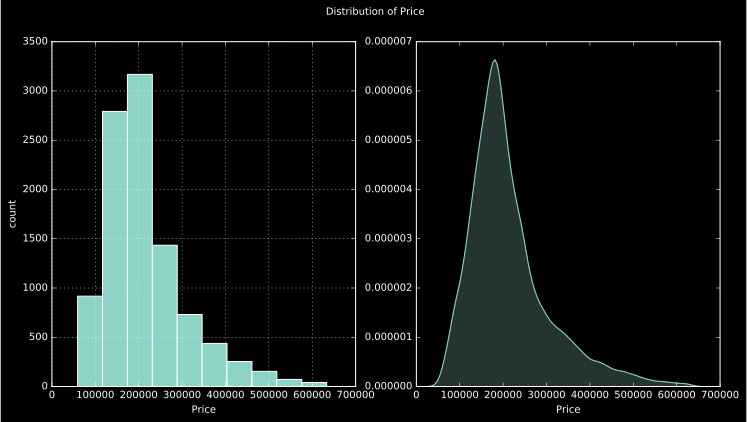

In [200]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [201]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()

target_mean, target_median

(214138.86, 192269.64487934904)

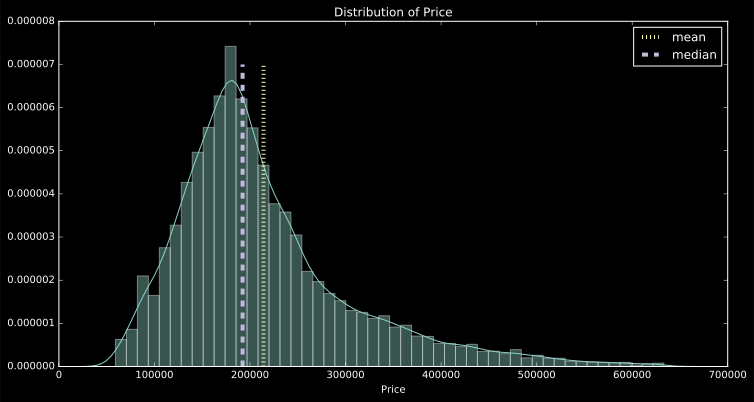

In [205]:
plt.figure(figsize = (12, 6))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000007, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

In [206]:
df.dtypes

DistrictId         int64
Rooms              int64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor         int64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        int64
Ecology_3_A        int64
Shops_2_A          int64
dtype: object

#### Анализ количественных признаков

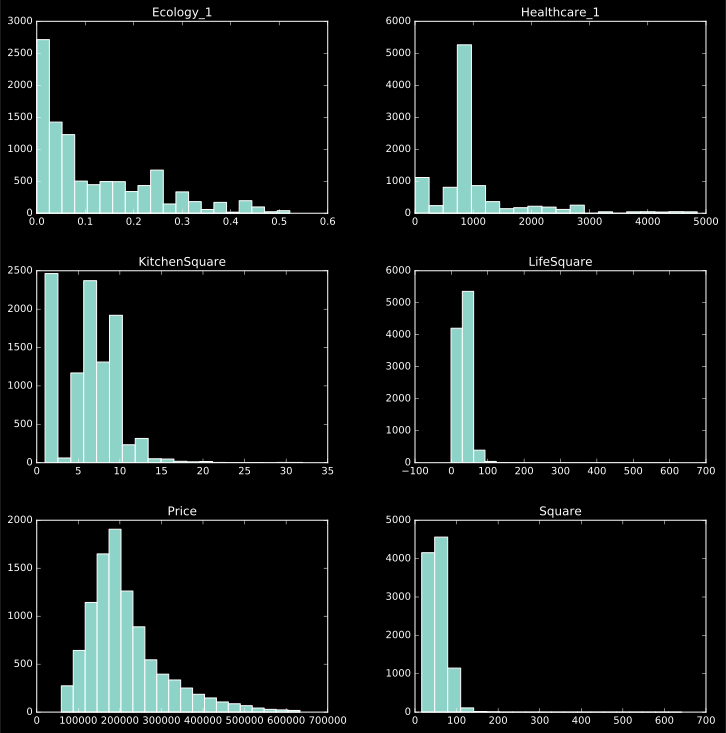

In [208]:
df_num_features = df.select_dtypes(include='float64')
df_num_features.hist(figsize=(12,12), bins=20, grid=False);

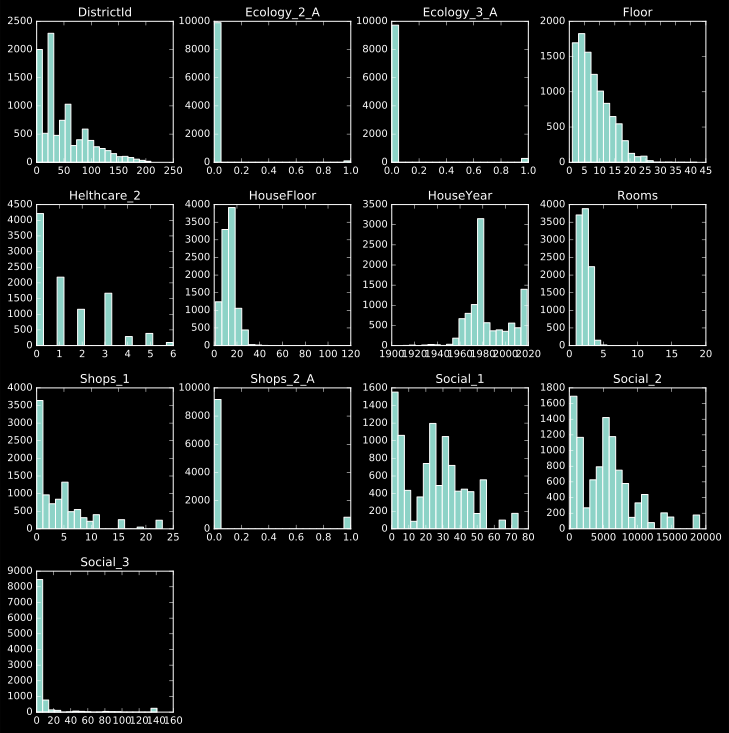

In [210]:
df_int_num_features = df.select_dtypes(include='int64')
df_int_num_features.hist(figsize=(12,12), bins=20, grid=False);

#### Бинарные признаки

In [219]:
df_bin_features = df_int_num_features.copy()
df_bin_features.drop(['DistrictId', 'Floor', 'Helthcare_2','HouseFloor','HouseYear','Rooms','Shops_1','Social_1','Social_2','Social_3'], axis='columns', inplace=True)
df_bin_features.dtypes

Ecology_2_A    int64
Ecology_3_A    int64
Shops_2_A      int64
dtype: object

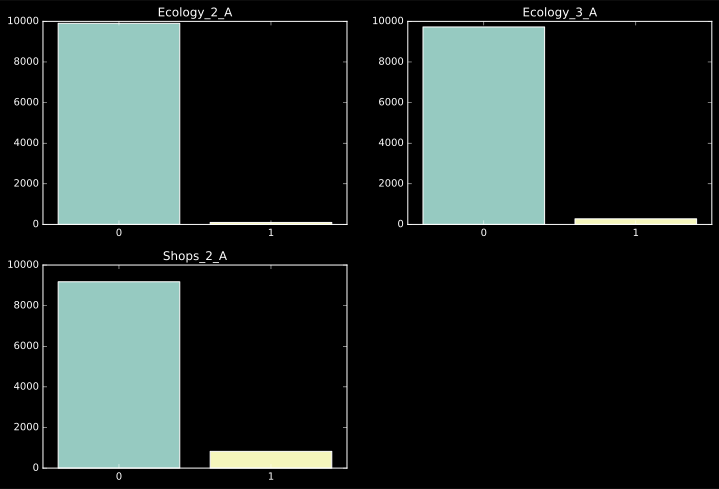

In [220]:
plt.figure(figsize = (12,12))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### Матрица корелляций

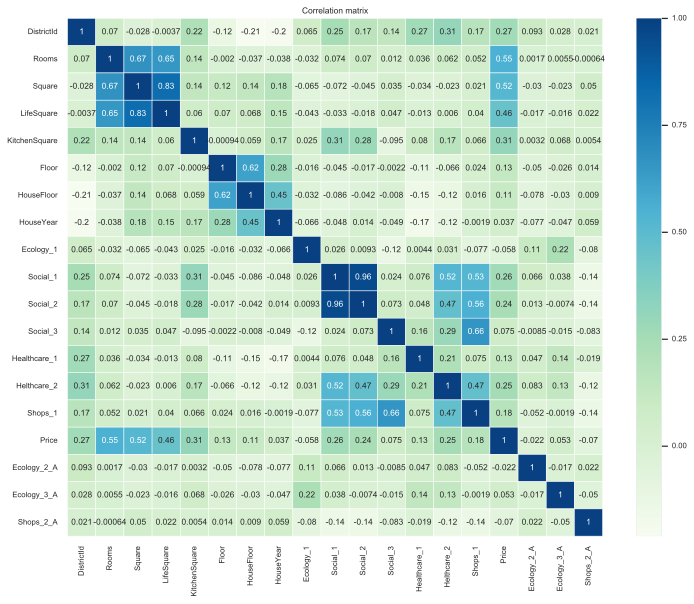

In [226]:
plt.figure(figsize = (12,9))

sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()